In [1]:
pkg load signal

est_ok_1 = 1.0036e-16


est_ok_2 = 3.2951e-16


est_sig = 2.2160e-16


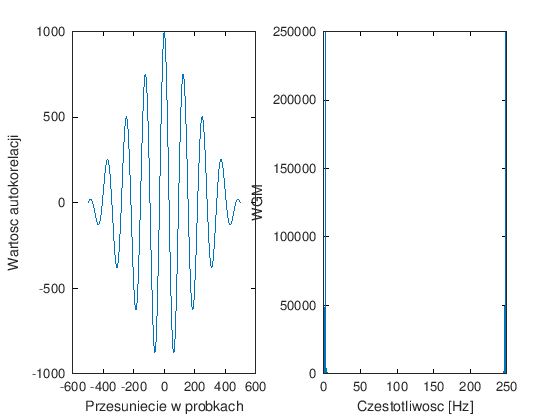

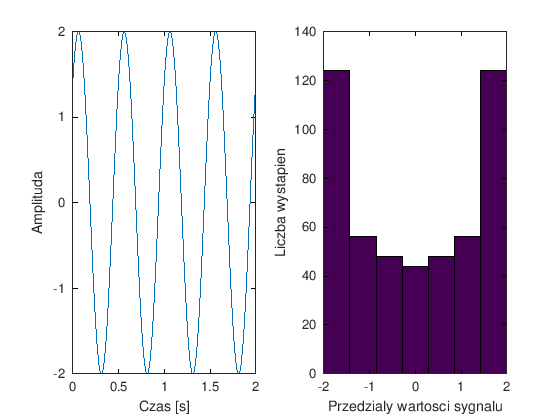

In [2]:
f=2;
fs=250;
t_sig=2;
A=2;
phi= pi/4;

delta_t = 1/fs;
t=0:delta_t:t_sig-delta_t;

sig = A*sin(2*pi*f*t+phi);

maxlag = t_sig*fs;

sig_corr = xcorr(sig, sig, maxlag);

N_corr = -maxlag:1:maxlag;

wgm = abs(fft(sig_corr));
f_step = fs/length(wgm); 
freq = 0:f_step:fs-f_step;

okres_1 = sig(1:250);
okres_2 = sig(251:500);

est_ok_1 = mean(okres_1)
est_ok_2 = mean(okres_2)
est_sig = mean(sig)


figure
subplot(1,2,1)
plot(t, sig)
xlabel('Czas [s]')
ylabel('Amplituda')

subplot(1,2,2)
hist(sig, 7)
xlabel('Przedzialy wartosci sygnalu')
ylabel('Liczba wystapien')

figure
subplot(1,2,1)
plot(N_corr, sig_corr)
xlabel('Przesuniecie w probkach')
ylabel('Wartosc autokorelacji')

subplot(1,2,2)
plot(freq, wgm)
xlabel('Czestotliwosc [Hz]')
ylabel('WGM')


est_ok_1 = 1.3657


est_ok_2 = -0.2227


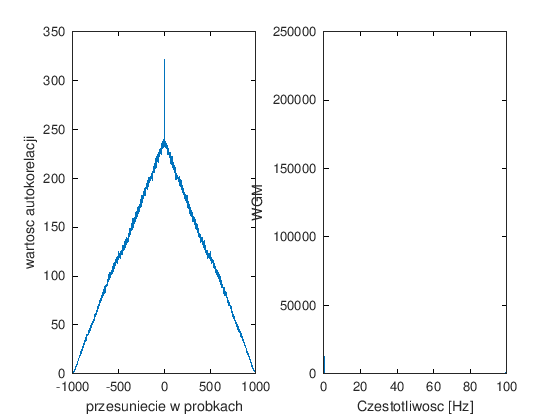

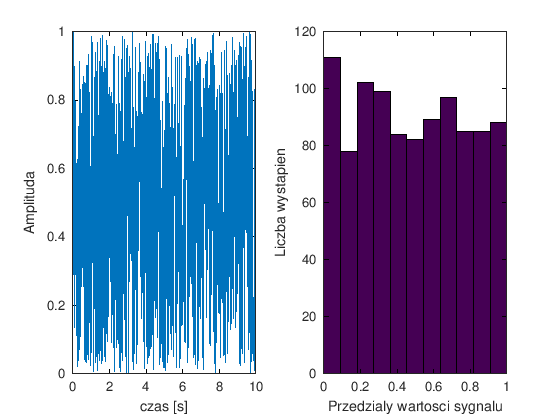

In [3]:
fs=100;
t_sig=10;

delta_t = 1/fs;
t = 0:delta_t:t_sig-delta_t;
okres_1 = sig(1:50);
okres_2 = sig(50:150);

est_ok_1 = mean(okres_1)
est_ok_2 = mean(okres_2)
est_sig = mean(sig);

sig = rand(1, t_sig*fs);

maxlag = t_sig*fs;

%sig=sig-mean(sig);

sig_corr = xcorr(sig, sig, maxlag);
N_corr = -maxlag:1:maxlag;

figure
subplot(1,2,1)
plot(t, sig)
xlabel('czas [s]')
ylabel('Amplituda')

subplot(1,2,2)
hist(sig, 11)
xlabel('Przedzialy wartosci sygnalu')
ylabel('Liczba wystapien')

figure
subplot(1,2,1)
plot(N_corr, sig_corr)
xlabel('przesuniecie w probkach')
ylabel('wartosc autokorelacji')


wgm = abs(fft(sig_corr));
f_step = fs/length(wgm);
freq = 0:f_step:fs-f_step;

subplot(1,2,2)
plot(freq, wgm)
xlabel('Czestotliwosc [Hz]')
ylabel('WGM')


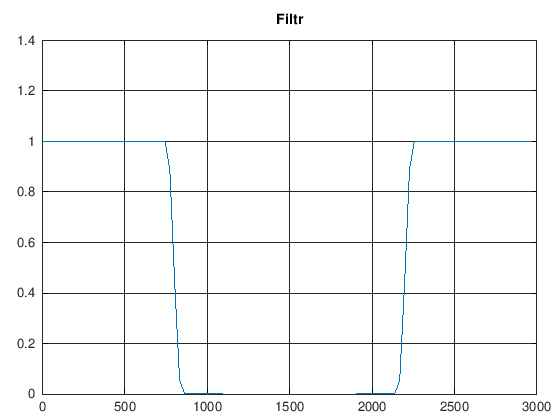

In [4]:
fs = 3000;
M  = 101;
fp = 200;
fk = 1200;
fc = 800/(fs/2);

h = fir1(M-1, fc, "low");
delta_t = 1/fs;
t = 0:delta_t:1-delta_t;

transmitancja=abs(fft(h));

N_tf = length(h);
f_step = fs/N_tf;
freq = 0:f_step:fs - f_step;

figure
plot(freq, transmitancja)
title("Filtr")
grid on


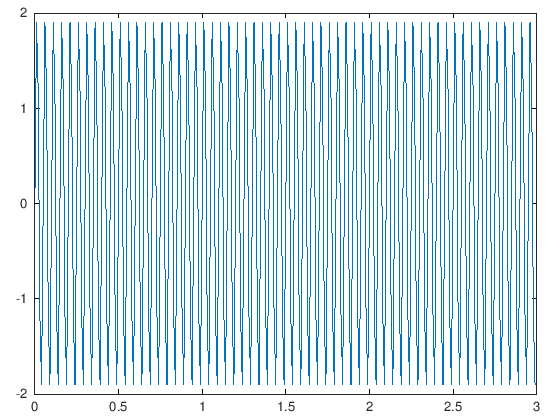

In [5]:
A = 2;
f = 20;

fs = 100;
delta_t=1/fs;
t = 0:delta_t:3-delta_t;
sig = A*sin(2*pi*f*t);


figure
plot(t, sig)





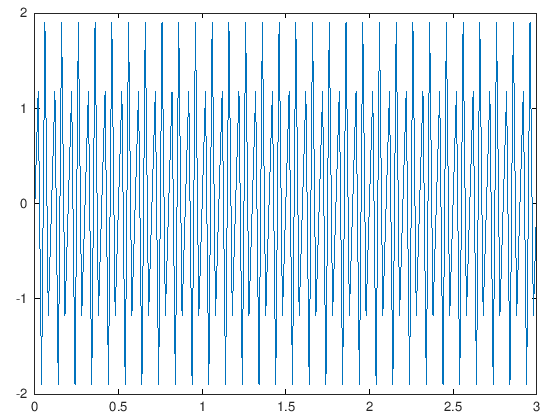

In [6]:
A = 2;
f = 20;
t = 0:0.02:3;
fs = 100;
delta_t=1/fs;
%t = 0:delta_t:3-delta_t;
sig = A*sin(2*pi*f*t);


figure
plot(t, sig)

ans = 100


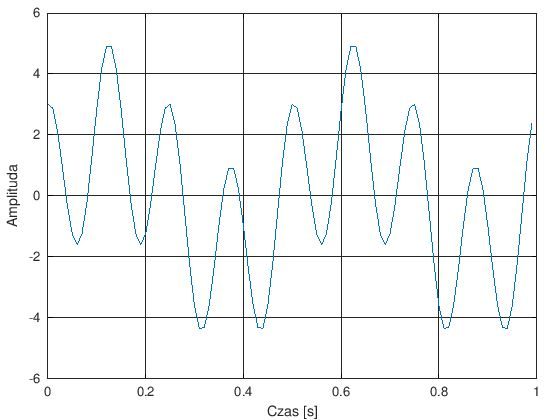

In [7]:
t=0:1/100:1-1/100;
sig = 2*sin(2*pi*2*t)+3*cos(2*pi*8*t);
length(t)
figure
plot(t, sig)
xlabel('Czas [s]')
ylabel('Amplituda')
grid on

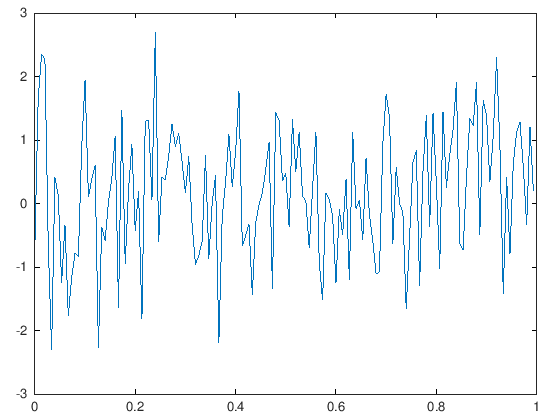

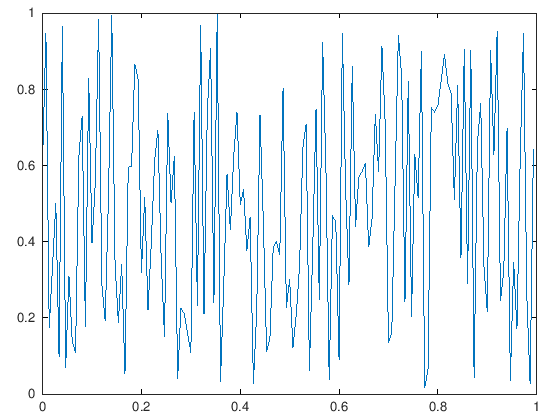

In [8]:
t = 0:1/150:1-1/150;

szum_sred = rand(1, length(t));
szum_gaus = randn(1, length(t));

figure
plot(t, szum_sred)

figure
plot(t, szum_gaus)

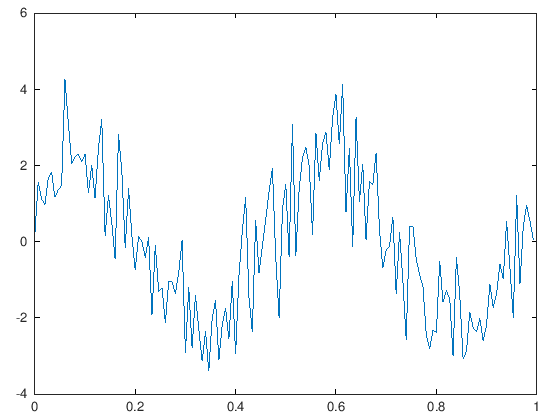

In [9]:
fs = 150;
t = 0:1/150:1-1/150;
szum_gaus = randn(1, length(t));
sig_sin = 2*sin(2*pi*2*t + pi/6) + szum_gaus;

figure
plot(t, sig_sin)

maxlag = 1


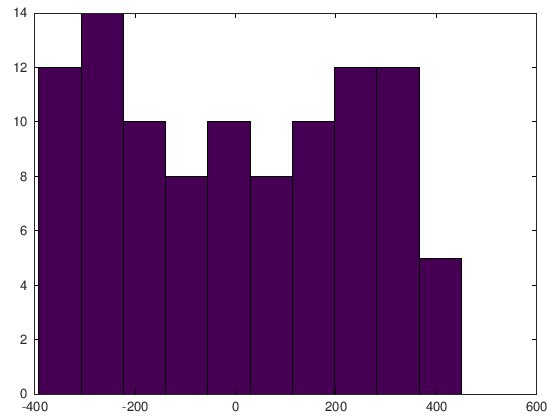

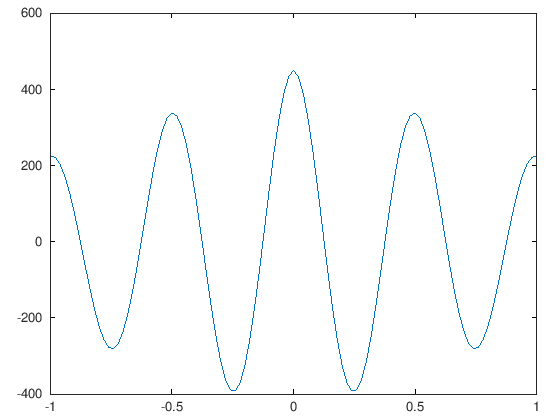

In [22]:
signal = A*sin(2*pi*f*t+phi);
delta_t = 0.02;
t=0:delta_t:2-delta_t;
A = 3;
f = 2;
phi = pi/4;

maxlag=1

sig_xcorr = xcorr(signal, signal, maxlag*1/delta_t);
N_xcorr = -maxlag:delta_t:maxlag;

figure
plot(N_xcorr, sig_xcorr)

figure
hist(sig_xcorr, 10)

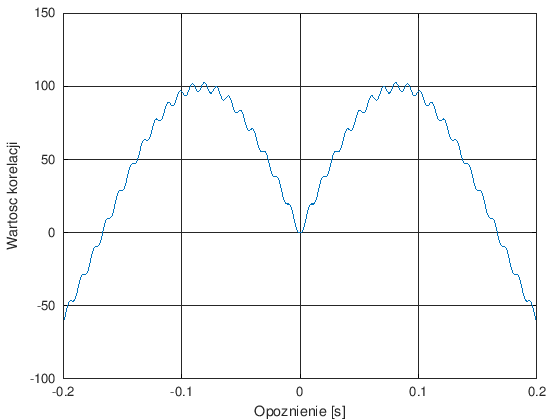

In [12]:
fs=6000;
dt=1/fs;
t=0:dt:1-dt;
ref=5*sin(2*pi*t*3);
sig_return=2*sin(2*pi*t*96);
kmaxsec=0.2;
kmax=kmaxsec*fs;
r=xcorr(ref, sig_return, kmax);
tr=[-kmax:1:kmax]*dt;
plot(tr, r)
xlabel('Opoznienie [s]')
ylabel('Wartosc korelacji')
grid on